# Лабораторная работа №3

### Используемые библиотеки

In [455]:
import pandas as pd
import mlxtend.frequent_patterns as fp
import mlxtend.preprocessing as pp
from matplotlib import pyplot as plt

### Исходные данные:
[`dataset_group.csv`](https://www.kaggle.com/acostasg/random-shopping-cart)

## Загрузка данных

In [456]:
complete = pd.read_csv('dataset_group.csv', header=None)

unique_id = list(set(complete[1]))
print(f"Количество различных покупателей в списке: {len(unique_id)}")

items = list(set(complete[2]))
print(f"Количество различных товаров в списке: {len(items)}")

dataset = [[elem for elem in complete[complete[1] == customer_id][2] if elem in items] for customer_id in unique_id]

Количество различных покупателей в списке: 1139
Количество различных товаров в списке: 38


## Подготовка данных

In [457]:
te = pp.TransactionEncoder()
frame = pd.DataFrame(te.fit_transform(dataset), columns=te.columns_)
frame

,all- purpose,aluminum foil,bagels,beef,butter,cereals,cheeses,coffee/tea,dinner rolls,dishwashing liquid/detergent,...,shampoo,soap,soda,spaghetti sauce,sugar,toilet paper,tortillas,vegetables,waffles,yogurt
0,True,True,False,True,True,False,False,False,True,False,...,True,True,True,False,False,False,False,True,False,True
1,False,True,False,False,False,True,True,False,False,True,...,True,False,False,False,False,True,True,True,True,True
2,False,False,True,False,False,True,True,False,True,False,...,True,True,True,True,False,True,False,True,False,False
3,True,False,False,False,False,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,False
4,True,False,False,False,False,False,False,False,True,False,...,False,False,True,True,False,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,False,False,True,False,True,True,True,True,True,...,True,True,False,False,True,False,False,False,False,False
1135,False,False,False,False,False,True,True,True,True,True,...,False,True,False,True,False,False,False,True,False,False
1136,False,False,True,True,False,False,False,False,True,True,...,True,True,False,False,True,False,True,True,False,True
1137,True,False,False,True,False,False,True,False,False,False,...,False,True,True,True,True,True,False,True,True,True


### Ассоциативный анализ с использованием алгоритма Apriori

In [458]:
results = fp.apriori(frame, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [459]:
results = fp.apriori(frame, min_support=0.3, use_colnames=True, max_len=1)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets,length
0,0.374890,(all- purpose),1
1,0.384548,(aluminum foil),1
2,0.385426,(bagels),1
3,0.374890,(beef),1
4,0.367867,(butter),1
5,0.395961,(cereals),1
6,0.390694,(cheeses),1
7,0.379280,(coffee/tea),1
8,0.388938,(dinner rolls),1
9,0.388060,(dishwashing liquid/detergent),1


In [460]:
results = fp.apriori(frame, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[results['length'] == 2]
print(f"Количество подходящих наборов: {len(results)}")
results

Количество подходящих наборов: 14


,support,itemsets,length
38,0.310799,"(vegetables, aluminum foil)",2
39,0.300263,"(vegetables, bagels)",2
40,0.310799,"(vegetables, cereals)",2
41,0.309043,"(vegetables, cheeses)",2
42,0.308165,"(vegetables, dinner rolls)",2
43,0.306409,"(dishwashing liquid/detergent, vegetables)",2
44,0.326602,"(vegetables, eggs)",2
45,0.302897,"(vegetables, ice cream)",2
46,0.309043,"(vegetables, laundry detergent)",2
47,0.311677,"(vegetables, lunch meat)",2


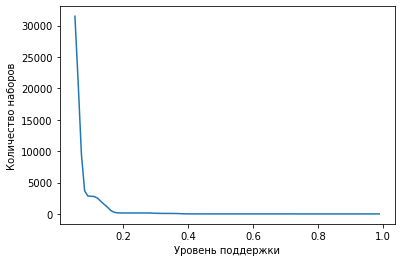

In [461]:
x_ax = [i/100 for i in range(5, 100)]
y_ax = [fp.apriori(frame, min_support=i) for i in x_ax]

plt.plot(x_ax, [i.size for i in y_ax])
plt.xlabel("Уровень поддержки")
plt.ylabel("Количество наборов")
plt.show()

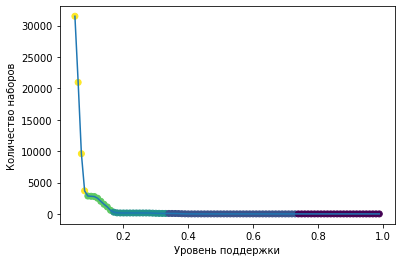

In [462]:
d_ax = [set(i['itemsets'].apply(lambda x: len(x)).to_list()) for i in y_ax]
plt.plot(x_ax, [i.size for i in y_ax])
plt.scatter(x_ax, [i.size for i in y_ax], c=[len(i) for i in d_ax])
plt.xlabel("Уровень поддержки")
plt.ylabel("Количество наборов")
plt.show()

In [463]:
results = fp.apriori(frame, min_support=0.38, use_colnames=True, max_len=1)
new_items = [list(elem)[0] for elem in results['itemsets']]
new_dataset = [[elem for elem in complete[complete[1] == customer_id][2] if elem in new_items] for customer_id in unique_id]
print(f"Длина нового датасета: {len(new_dataset)}")

Длина нового датасета: 1139


In [464]:
new_frame = pd.DataFrame(te.fit_transform(new_dataset), columns=te.columns_)
new_frame

,aluminum foil,bagels,cereals,cheeses,dinner rolls,dishwashing liquid/detergent,eggs,ice cream,lunch meat,milk,poultry,soda,vegetables,waffles,yogurt
0,True,False,False,False,True,False,False,True,True,False,False,True,True,False,True
1,True,False,True,True,False,True,False,False,False,True,False,False,True,True,True
2,False,True,True,True,True,False,True,True,True,True,True,True,True,False,False
3,False,False,True,False,False,False,False,False,True,False,False,True,False,False,False
4,False,False,False,False,True,False,True,False,False,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,False,False,True,True,True,True,False,True,False,False,True,False,False,False,False
1135,False,False,True,True,True,True,True,False,True,True,True,False,True,False,False
1136,False,True,False,False,True,True,True,False,True,False,True,False,True,False,True
1137,False,False,False,True,False,False,False,False,False,True,True,True,True,True,True


In [465]:
results = fp.apriori(new_frame, min_support=0.3, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results

,support,itemsets,length
0,0.384548,(aluminum foil),1
1,0.385426,(bagels),1
2,0.395961,(cereals),1
3,0.390694,(cheeses),1
4,0.388938,(dinner rolls),1
5,0.388060,(dishwashing liquid/detergent),1
6,0.389816,(eggs),1
7,0.398595,(ice cream),1
8,0.395083,(lunch meat),1
9,0.380158,(milk),1


In [466]:
results = fp.apriori(new_frame, min_support=0.15, use_colnames=True)
results['length'] = results['itemsets'].apply(lambda x: len(x))
results = results[(results['length'] > 1) & results.apply(lambda x: {'yogurt', 'waffles'}.issubset(x['itemsets']), axis=1)]
results

,support,itemsets,length
118,0.173837,"(waffles, yogurt)",2


In [467]:
minus_dataset = [[elem for elem in complete[complete[1] == customer_id][2] if elem not in new_items] for customer_id in unique_id]
print(f"Длина нового датасета: {len(minus_dataset)}")
minus_frame = pd.DataFrame(te.fit_transform(minus_dataset), columns=te.columns_)
minus_frame

Длина нового датасета: 1139


,all- purpose,beef,butter,coffee/tea,flour,fruits,hand soap,individual meals,juice,ketchup,...,pasta,pork,sandwich bags,sandwich loaves,shampoo,soap,spaghetti sauce,sugar,toilet paper,tortillas
0,True,True,True,False,True,False,False,False,False,False,...,False,True,True,False,True,True,False,False,False,False
1,False,False,False,False,False,False,True,True,False,False,...,False,False,True,False,True,False,False,False,True,True
2,False,False,False,False,False,False,True,False,False,True,...,False,True,False,True,True,True,True,False,True,False
3,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
4,True,False,False,False,True,False,True,True,False,False,...,True,True,False,True,False,False,True,False,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1134,True,True,False,True,False,True,True,False,True,False,...,False,True,True,False,True,True,False,True,False,False
1135,False,False,False,True,False,False,True,True,False,False,...,True,False,False,False,False,True,True,False,False,False
1136,False,True,False,False,False,False,True,True,True,False,...,False,True,False,False,True,True,False,True,False,True
1137,True,True,False,False,False,False,False,False,False,True,...,False,False,True,False,False,True,True,True,True,False
